<a href="https://colab.research.google.com/github/jhj030722/Machine-Learning/blob/main/%EC%A3%BC%ED%98%84_titanic_240907.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [2]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/titanic/titanic/asset/'
args.train_csv = args.default_path+'train.csv' #위의 파일 경로에다가 추가 경로만 덧붙이는 거. 이런 것이 가능하다라는 것을 알기
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

#easydict 라이브러리를 사용하여 간단한 설정 및 변수들을 정의하고 초기화하는 작업을 수행

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 파일 경로

ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
submission = pd.read_csv(args.submission_csv)

# 1. 데이터 파악



*   Surived:0=사망, 1=생존
* Pclass: 1=1등석, 2=2등석, 3=3등석
* gender:male=남성, female=여성
* Age: 나이
* SibSp: 타이타닉 호에 동승한 자매/배우자의 수
* Parch: 타이타닉 호에 동승한 부모/자식의 수
* Ticket: 티켓 번호
* Fare: 승객 요금
* Cabin: 방 호수
* Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴



In [5]:
ori_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
ori_test.head()  # 생존여부 예측 (survived 컬럼이 없다)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(ori_train.shape) # 819개 데이터
print(ori_test.shape) # survived 예측~

(891, 12)
(418, 11)


## 결측치

In [8]:
ori_train.info()
#age에 결측치
#cabin에 결측치
#embarked 결측치 2개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
ori_test.info()

# 특이사항: Fare에 결측치 1개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# 결측치 확인
print(ori_train.isnull().sum())
print("-------------------------")
print(ori_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

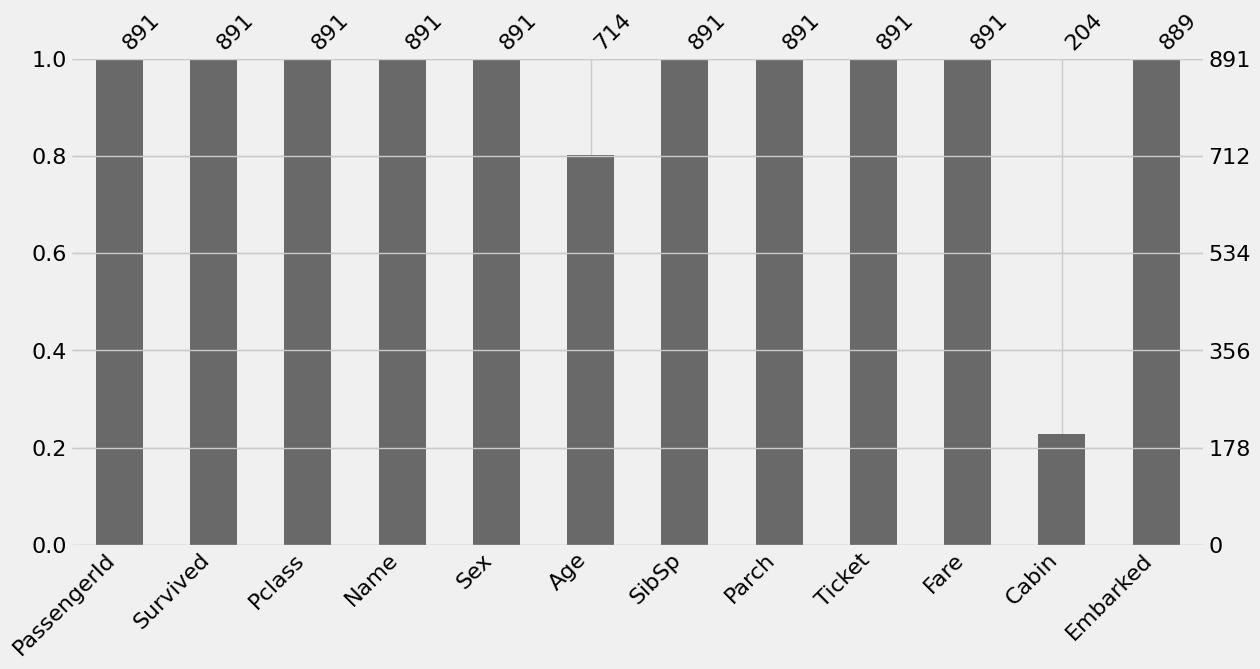

In [11]:
# 시각화 (결측치)
import missingno as msno

msno.bar(df = ori_train, figsize = (13,6))

<Axes: >

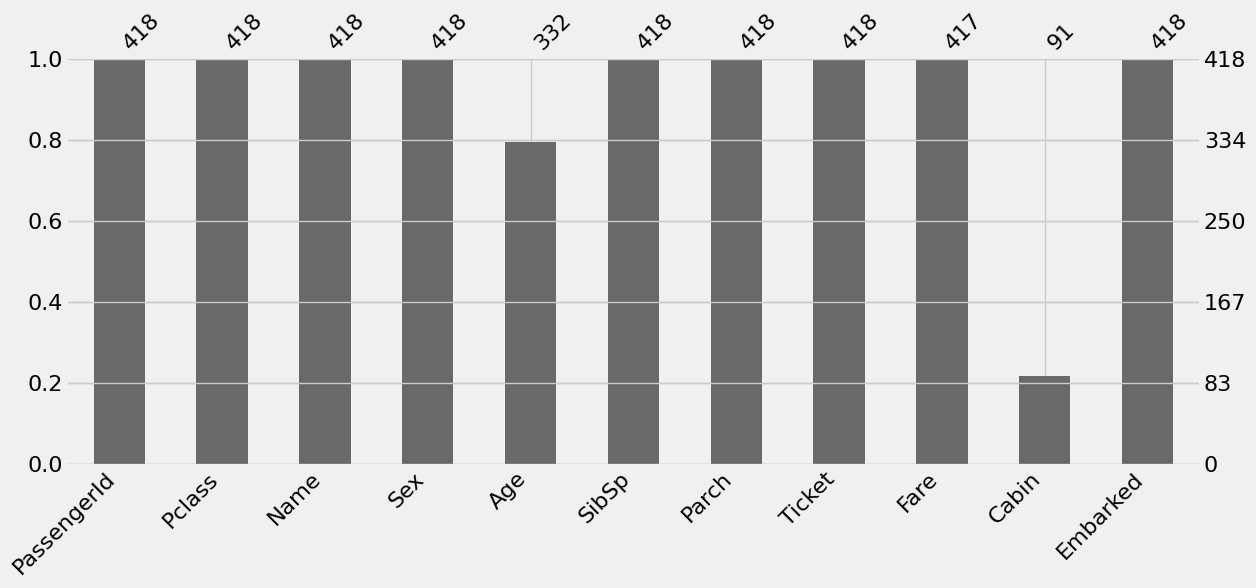

In [12]:
msno.bar(df = ori_test, figsize=(13,5))

⚓ **Cabin은 결측치가 너무 많으니 차라리 제외하는게 나을듯.**

## 이상치

<Axes: ylabel='Fare'>

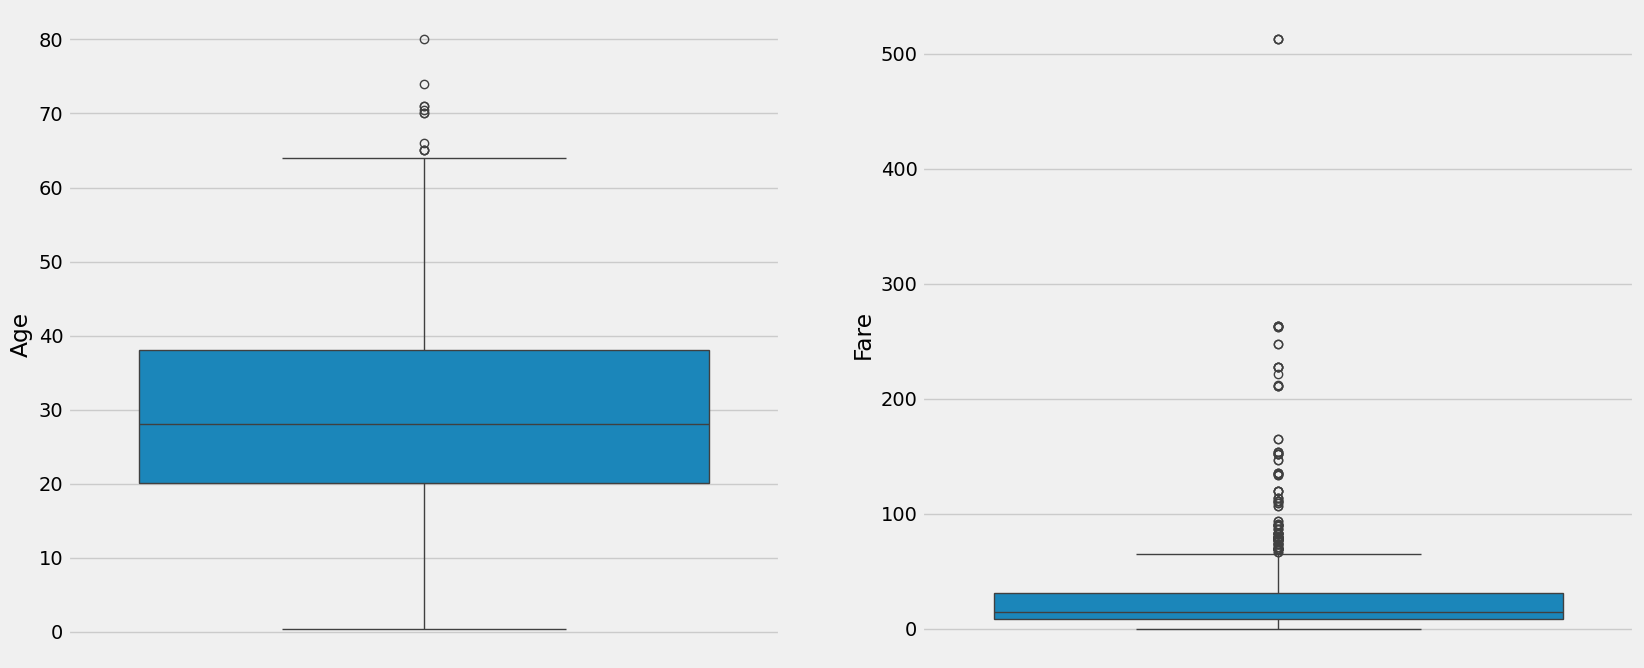

In [13]:
# subplot 그리기 (박스플롯)

f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(ori_train['Age'], ax=ax[0])
sns.boxplot(ori_train['Fare'], ax=ax[1])


- age는 정규분포에서 크게 벗어나지 않는 모습( 밑에 eda)
- fare는 극단적인 값 다수 분포 => 비정규분포에 가까운

<Axes: xlabel='Fare', ylabel='Density'>

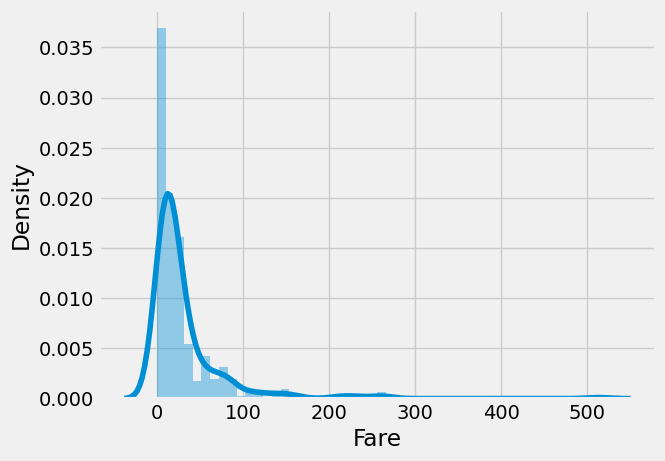

In [14]:
sns.distplot(ori_train['Fare'])

# 2. EDA

## Sex

<Axes: xlabel='Sex', ylabel='count'>

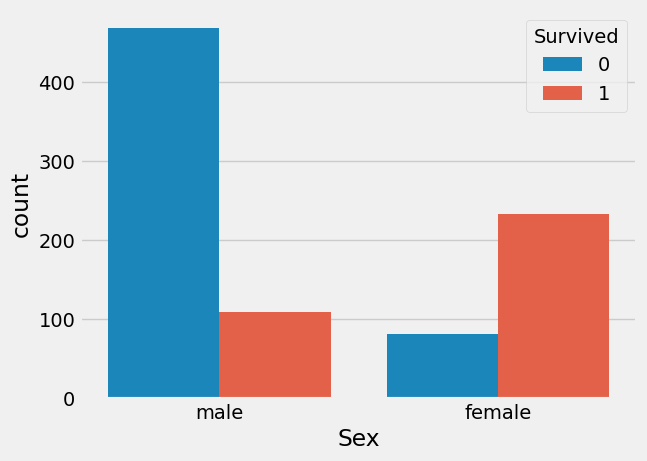

In [15]:
# 성별 따른 생존여부

ori_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

sns.countplot(x='Sex', hue='Survived', data=ori_train)

In [16]:
# 성별에 따른 생존

survival_rate = ori_train.groupby(['Sex'])['Survived'].mean()
survival_rate

,Survived
Sex,
female,0.742038
male,0.188908


- 여성이 남성에 비해 생존할 확률이 높다는 점 확인.

In [17]:
# Pclass별로 성별에 따른 생존률

ori_train[["Sex", "Pclass", "Survived"]].groupby(['Sex', 'Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


- 탑승좌석의 클래스가 높은 여성일수록 더 생존률이 높음을 확인.
- 클래스 1,2의 여성의 경우 생존률이 90%가 넘음을 확인.
- 모든 클래스에서 여성이 남성보다 살 확률이 높음

=> **Sex는 예측모델에 쓰일 중요한 피쳐**

## PClass

<Axes: xlabel='Pclass', ylabel='count'>

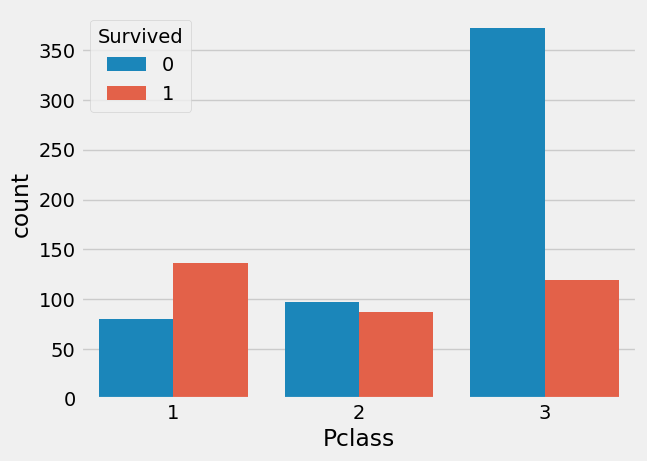

In [18]:
# 클래스에 따른 생존 여부

ori_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

sns.countplot(x='Pclass', hue='Survived', data=ori_train)


In [19]:
# 클래스별로 생존자 수


pd.crosstab(ori_train.Pclass,ori_train.Survived,margins=True).style.background_gradient(cmap='viridis')

# 클래스가 좋을수록 생존률이 높다.


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [20]:
#성별 및 클래스로
pd.crosstab([ori_train.Sex,ori_train.Survived],ori_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

- Class가 높을수록 생존자 수가 많음.
- Class가 높을수록, 남성보다 여성일수록 생존확률이 높음.

=> **PClass는 예측 모델에 쓰일 중요한 feature**

## Age

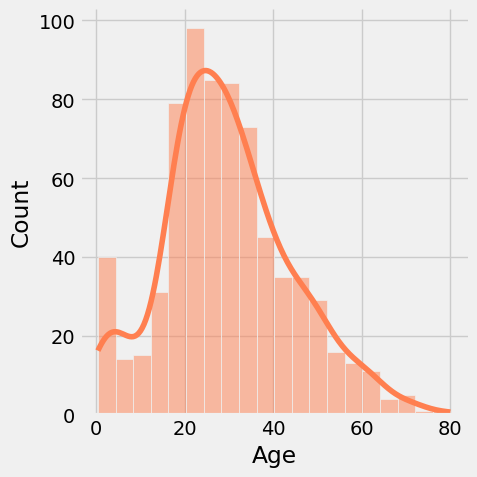

In [21]:
# 승객들의 나이 분포 알아보기 => 정규분포랑 앵간 비슷, 크게 쏠림 X => 결측치 메디안으로 가자

sns.displot(ori_train['Age'], kde=True, color='coral')
plt.show()

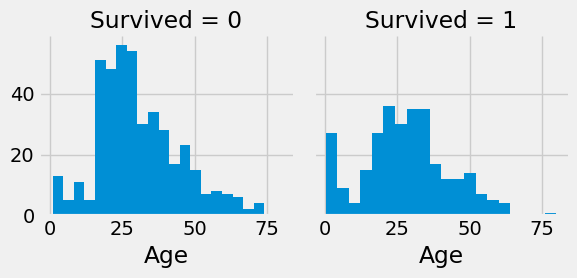

In [22]:
g = sns.FacetGrid(ori_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

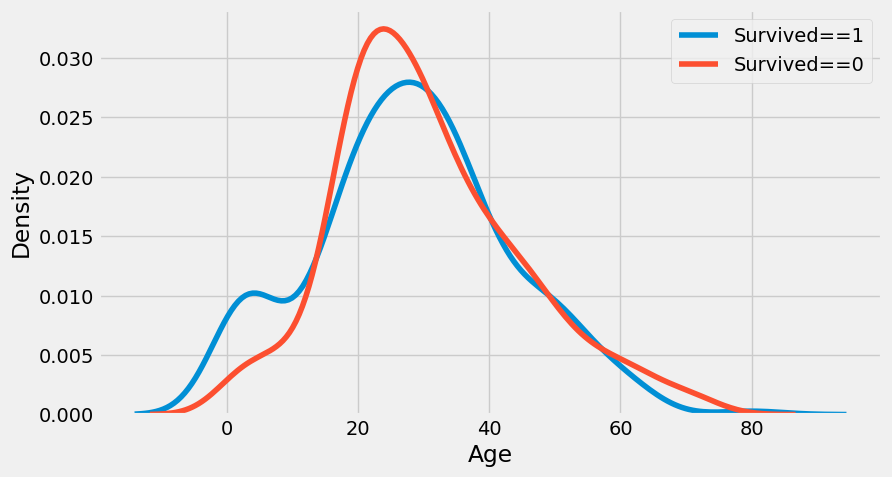

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(ori_train[ori_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(ori_train[ori_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

- **20세 이하의 어린 나이에서 상대적으로 살 확률이 높다.**
- 20~40대의 생존률은 단순히 그 나잇대의 사람이 많아서 위의 분포를 따르는 것으로 보임.

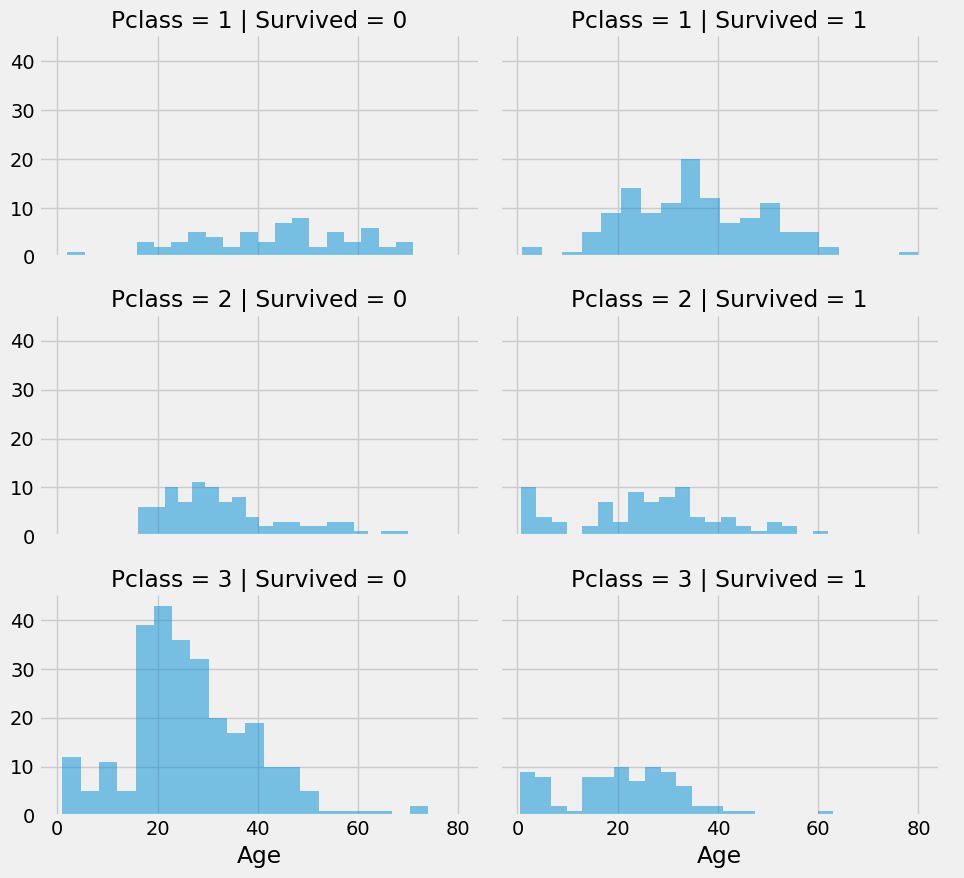

In [24]:
# Pclass, Survived 여부에 따른 연령대 분포 파악
grid = sns.FacetGrid(ori_train, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

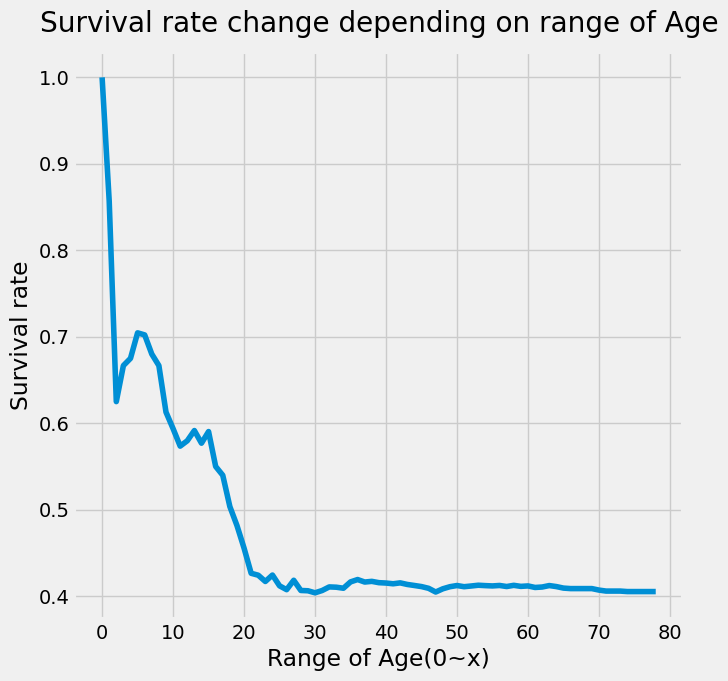

In [25]:
# age에 따른 생존률 누적확률 시각화

cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(ori_train[ori_train['Age'] < i]['Survived'].sum() / len(ori_train[ori_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

** 20대 이전의 어린 아이일수록 생존확률이 높다. **

## Embarked

<Axes: xlabel='Embarked', ylabel='count'>

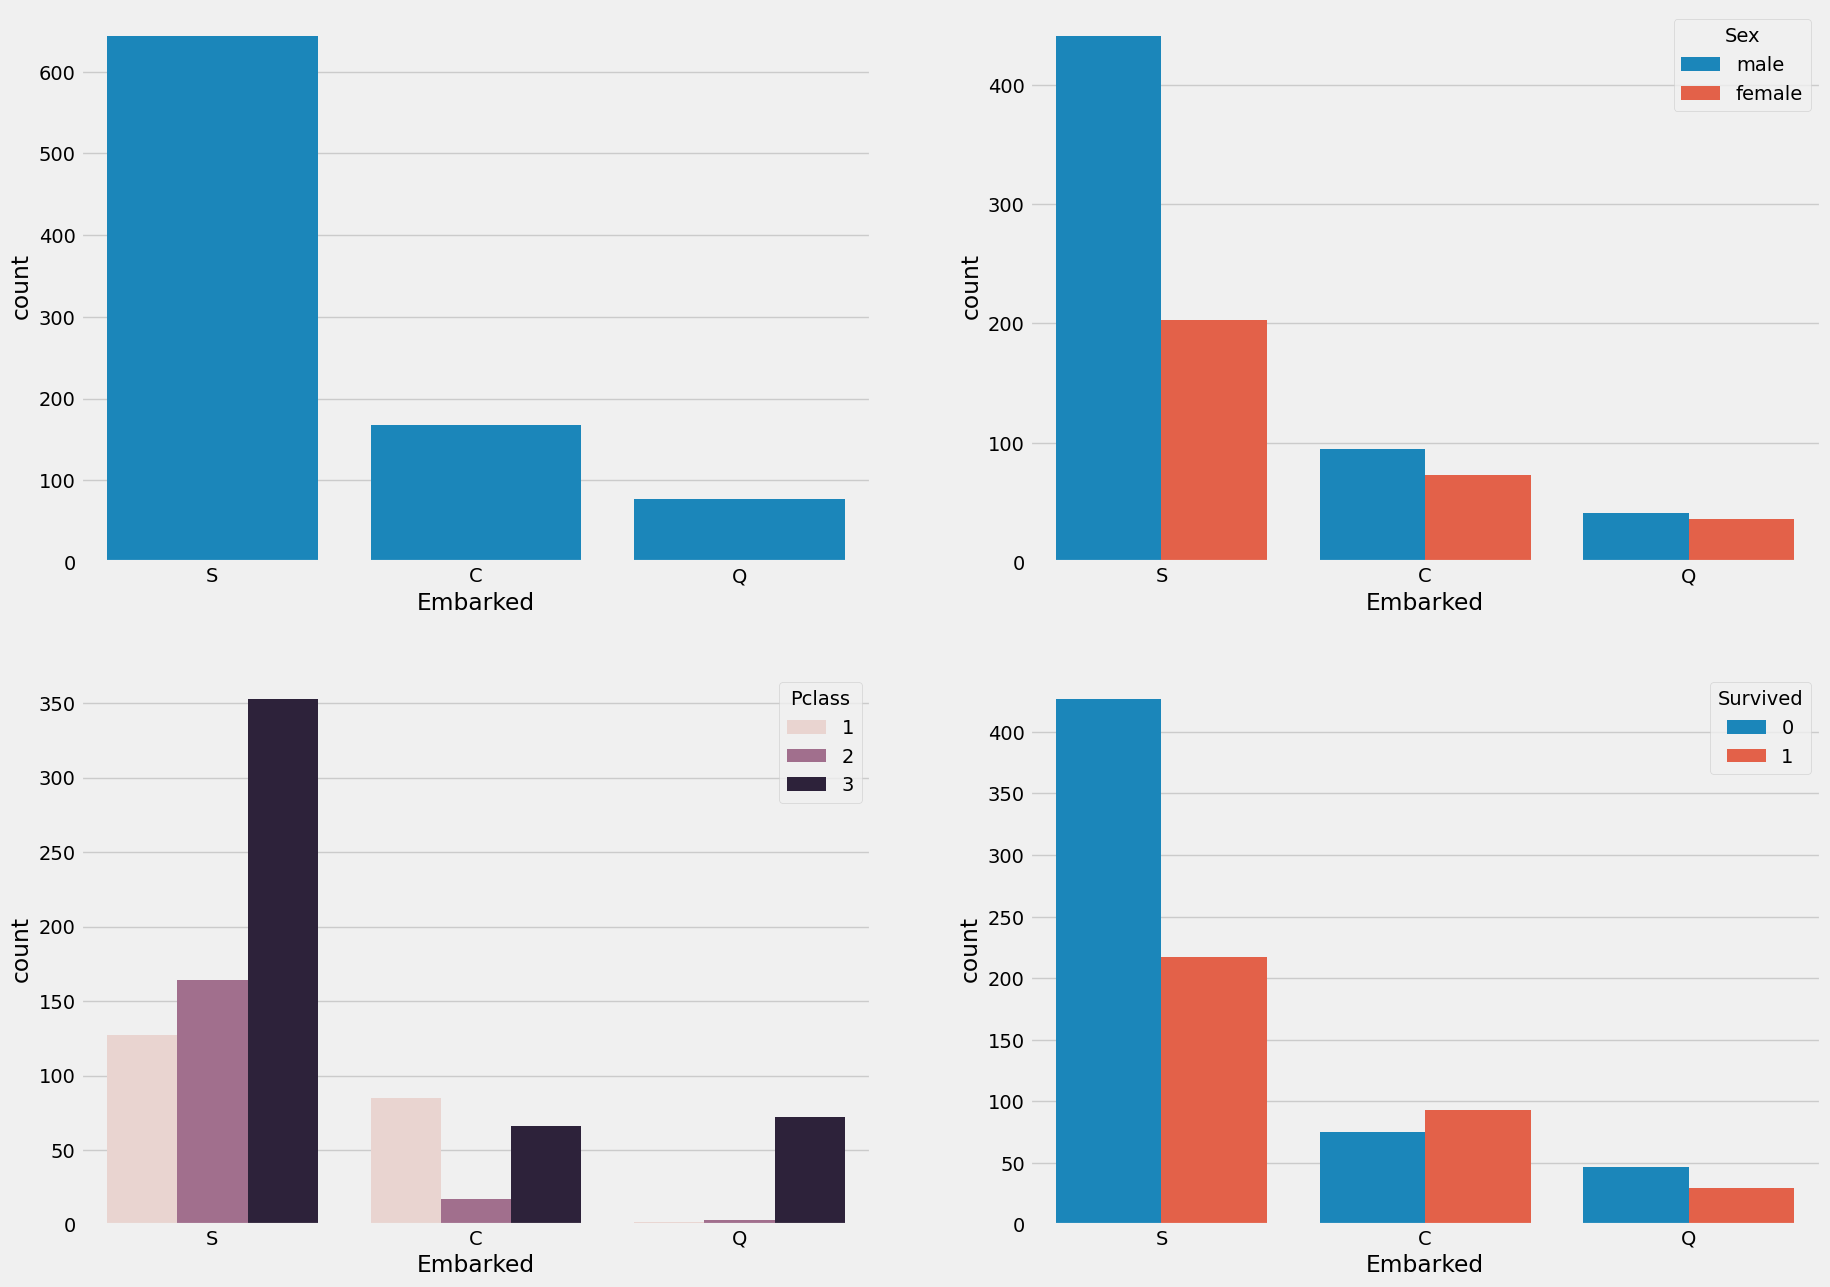

In [26]:
# Embarked 에 따른 분포
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot(x='Embarked', data=ori_train, ax=ax[0,0])
sns.countplot(x='Embarked', hue='Sex', data=ori_train, ax=ax[0,1])
sns.countplot(x='Embarked', hue='Pclass', data=ori_train, ax=ax[1,0])
sns.countplot(x='Embarked', hue='Survived', data=ori_train, ax=ax[1,1])

- S에서 가장 많이 탑승
- S는 남자가 여자보다 거의 절반 넘게 더 많이 탑승 (C와 Q는 비율이 비슷)
- 생존확률이 S가 가장 낮은 (남자가 많이 타서 잉ㄴ듯)
- S가 남자가 많이타고 + 3등급이 많이 타서 생존확률이 낮은 것으로 보임
- C에는 1등급 클래스 좌석 사람들이 많이타서 생존률이 높은듯함.

## SibSp, Parch

In [27]:
ori_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- 형제자매 수가 3명을 넘어갈수록 급감하는 생존율...

In [28]:
ori_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- 여기도 가족(부모자식) 수가 많을수록 생존율이 영 좋지 않다.. 4명 넘어가는 순간부터 거의 죽음..

### 파생변수 만들기(Family)

- **형제자매수(SibSp) + Parch(부모자녀) 합쳐서 탑승한 가족 총 숫자인 'Family'를 만들기**

In [29]:
ori_train['Family'] = ori_train['SibSp'] + ori_train['Parch']
ori_test['Family'] = ori_test['SibSp'] + ori_test['Parch']

In [30]:
# max, min 알아보기

print("Max size of family: ", ori_train['Family'].max())
print("Min size of family: ", ori_train['Family'].min())

# family = 0 이면 혼자 탄것,
# family = 10 이면 총 11명 탄 것

Max size of family:  10
Min size of family:  0


In [31]:
# family 수에 따른 생존률

ori_train[["Family", "Survived"]].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


- 본인 제외 가족이 3명일 때 생존률이 제일 높음
- **그 이후로는 가족 수가 많아질수록 생존률 급감...**
- 가족이 1명~3명 있을 때 생존률이 더 높음

<Axes: xlabel='Family', ylabel='count'>

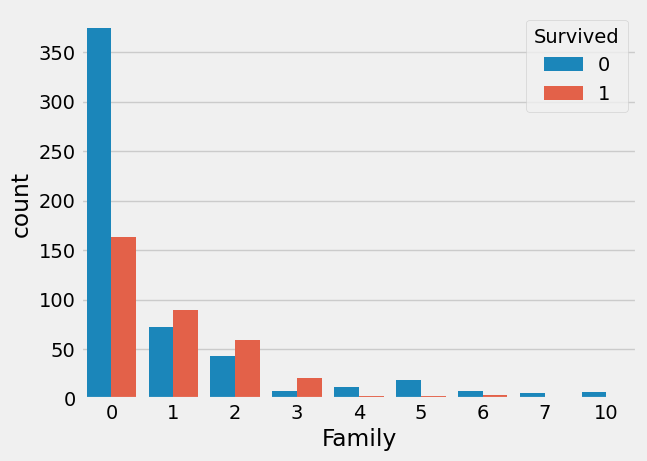

In [32]:
# # family 수에 따른 생존률 시각화

sns.countplot(x='Family', hue='Survived', data=ori_train)


# 3. 피쳐 엔지니어링

** 주의 **
Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로,
train 뿐만 아니라 test 도 똑같이 적용해주어야함!!

## 1) Fare

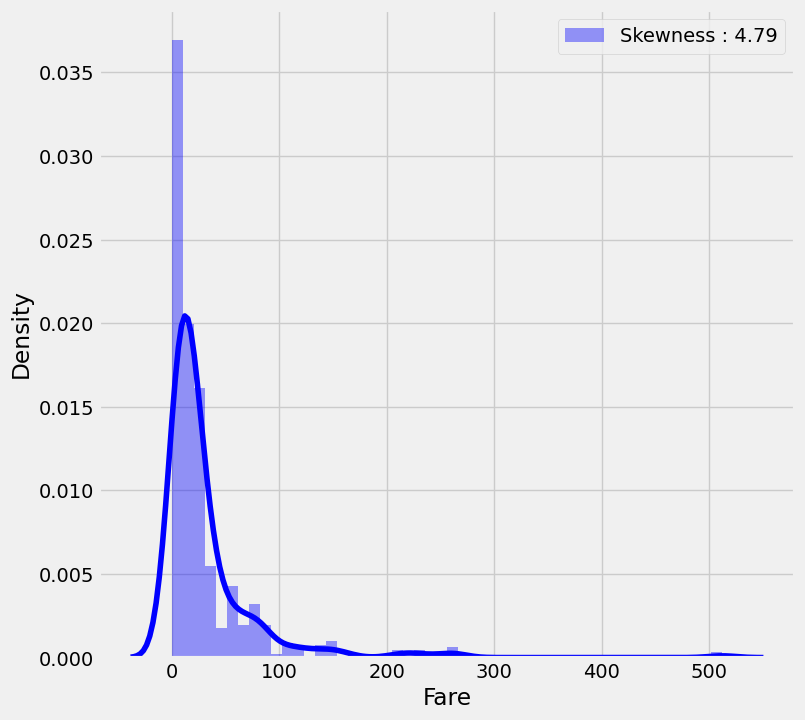

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(ori_train['Fare'], color='b', label='Skewness : {:.2f}'.format(ori_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 왜도 = 0: 완전히 대칭적인 분포 (정규분포)
- -0.5 < 왜도 < 0.5: 거의 대칭적인 분포
- -1 < 왜도 < -0.5 또는 0.5 < 왜도 < 1: 약간의 비대칭성 (약한 왜도)
- 왜도 < -1 또는 왜도 > 1: 왜도가 높은 비대칭 분포 (높은 왜도)

**따라서 Fare는 왜도가 높은, 비대칭적인 분포를 가진 (not 정규분포 따름) 변수**



---



---



- **test셋의 fare의 결측치 1개: mean으로 대체**

In [34]:
# test set에 Fare 피쳐에 null값 1개
# Fare의 평균값으로 null값 대체

ori_test['Fare'].fillna(ori_train['Fare'].mean(), inplace=True)

# 결측치 대체 확인
print(ori_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Family           0
dtype: int64


### log 변환으로 비대칭성 줄이기

In [66]:
# 로그 변환을 통해 비대칭성 보정해서 정규화하기

ori_train['Fare'] = ori_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
ori_test['Fare'] = ori_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

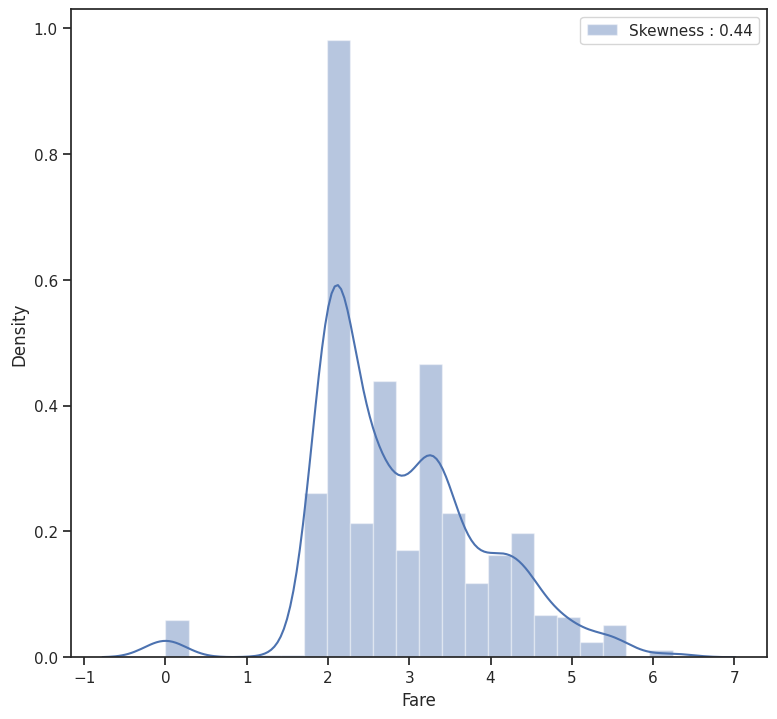

In [67]:
ig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(ori_train['Fare'], color='b', label='Skewness : {:.2f}'.format(ori_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2) Cabin

- **cabin은 결측치가 거의 80%에 가까워서.. 모델링에 포함하지 않도록 결정**

## 3) Ticket

In [35]:
ori_train['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


## 4) 결측치 보간

### age

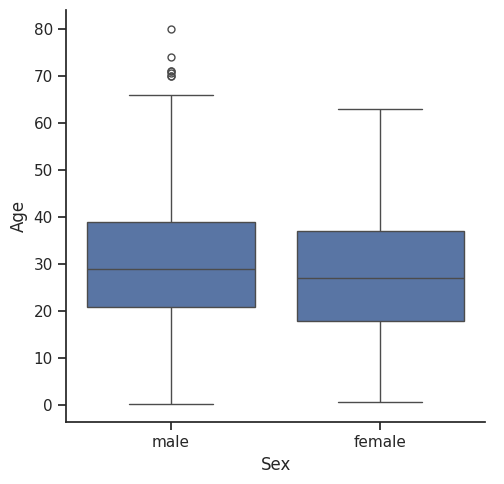

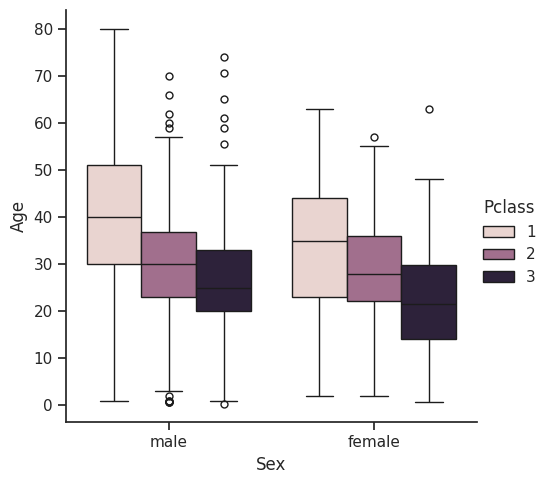

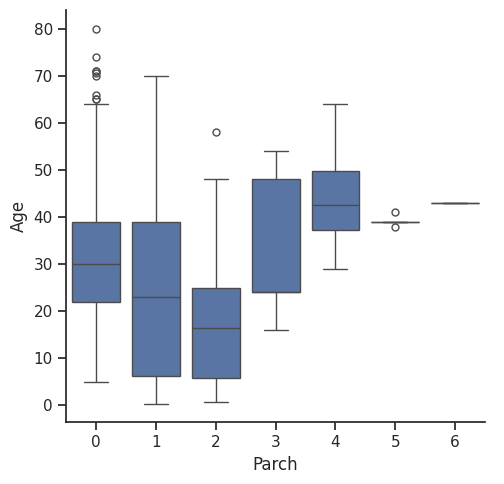

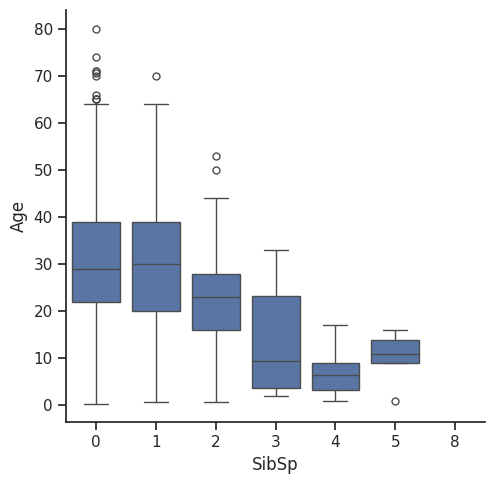

In [54]:
# Age 결측치 보간 시 유의미한 다른 변수는?

# sex에 따른 age boxplot
g = sns.catplot(y="Age",x="Sex",data=ori_train,kind="box")
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=ori_train,kind="box")
g = sns.catplot(y="Age",x="Parch", data=ori_train,kind="box")
g = sns.catplot(y="Age",x="SibSp", data=ori_train,kind="box")

- sex에 따른 age 분포 차이는 거의 X
- Pclass에 따라 age 분포 차이가 있음 => 1등급 좌석 승객들이 나이가 더 많은 경향
- 부모자녀가 2-3명 있는 승객은 형제자매가 있는 승객보다 나이가 더 많은 경향

### 성별 인코딩

In [55]:
# 성별 인코딩: 남자 - 0, 여자 - 1

ori_train['Sex'] = ori_train['Sex'].map({'male':0, 'female':1})
ori_test['Sex'] = ori_test['Sex'].map({'male':0, 'female':1})

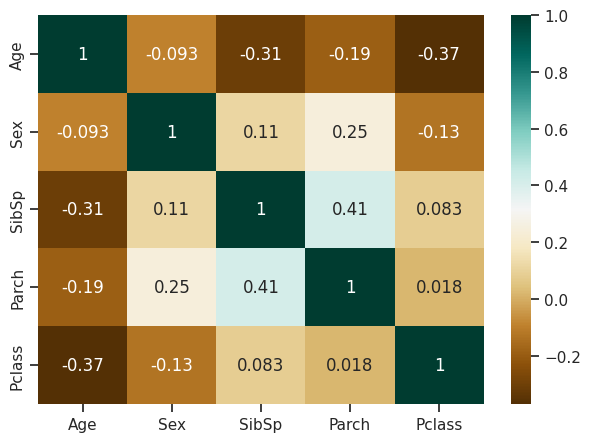

In [58]:
g = sns.heatmap(ori_train[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

- sex랑 age는 별 상관 없음 (-0.093)
- pclass랑 age는 음의 상관관계 -0.37
- parch와 age는 -0.19정도의 상관관계
- sibSp와 age는 -0.31정도의 상관관계

In [61]:
# Pclass, SibSp에 따라 age 결측치 채우기

index_NaN_age = list(ori_train["Age"][ori_train["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = ori_train["Age"].median()
    age_pred = ori_train["Age"][((ori_train['SibSp'] == ori_train.iloc[i]["SibSp"]) &
                                 (ori_train['Pclass'] == ori_train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        ori_train['Age'].iloc[i] = age_pred
    else :
        ori_train['Age'].iloc[i] = age_med

In [137]:
ori_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
Fare,0
Embarked,0
Family,0
Age_category,0
Initial,0


In [140]:
index2_NaN_age = list(ori_test["Age"][ori_test["Age"].isnull()].index)

for i in index2_NaN_age :
    age_med2 = ori_test["Age"].median()
    age_pred2 = ori_test["Age"][((ori_test['Pclass'] == ori_test.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred2) :
        ori_test['Age'].iloc[i] = age_pred2
    else :
        ori_test['Age'].iloc[i] = age_med2

In [141]:
ori_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
Family,0
Age_category,0
Initial,0


- 결측값을 가진 승객과 동일한 sibsp 구성을 가지고 같은 pclass 탑승한 승객들의 나이 median을 이용

In [64]:
# 보간된 age 결측치 확인하기

ori_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Embarked

- S구역에 제일 많이 탔으므로 결측치는 'S'로 채움

In [65]:
# S구역에 제일 많이 탔으므로 결측치는 'S'로 채움

ori_train['Embarked'].fillna('S', inplace=True)

## 5) age 카테고리 만들기

In [68]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

ori_train['Age_category'] = ori_train['Age'].apply(category_age)
ori_test['Age_category'] = ori_test['Age'].apply(category_age)

In [69]:
ori_train.groupby(['Age_category'])['Survived'].count()

,Survived
Age_category,
0,66
1,105
2,349
3,208
4,89
5,48
6,19
7,7


## 6) 라벨링

### name

- 호칭만 추출

In [74]:
# str method

ori_train['Initial'] = ori_train.Name.str.extract('([A-Za-z]+)\.')
ori_test['Initial'] = ori_test.Name.str.extract('([A-Za-z]+)\.')

ori_train['Initial'].head()

,Initial
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [75]:
pd.crosstab(ori_train['Initial'], ori_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
0,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
1,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0


In [80]:
ori_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

ori_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

<Axes: xlabel='Initial', ylabel='count'>

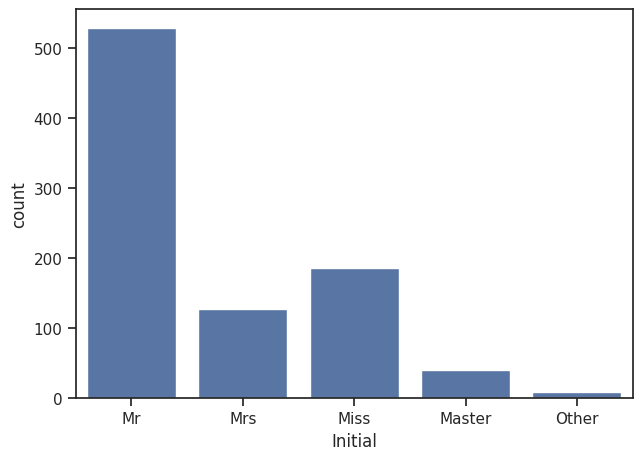

In [83]:
ori_train['Initial'].value_counts()

# 시각화
sns.countplot(x='Initial', data=ori_train)

- 호칭 라벨링
  - Mr = 0
  - Miss  = 1
  - Mrs = 2
  - Master = 3
  - Other = 4

In [84]:
ori_train['Initial'] = ori_train['Initial'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4})
ori_test['Initial'] = ori_test['Initial'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4})

### embarked

- S: 0
- C: 1
- Q: 2 로 라벨링

In [85]:
ori_train['Embarked'] = ori_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
ori_test['Embarked'] = ori_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [86]:
ori_train['Embarked'].isnull().any() , ori_train['Embarked'].dtypes

(False, dtype('int64'))

In [89]:
ori_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Age_category,Initial
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,1,1,3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,0,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,0,1,3,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,0,0,3,0


## 7) 히트맵

<Axes: >

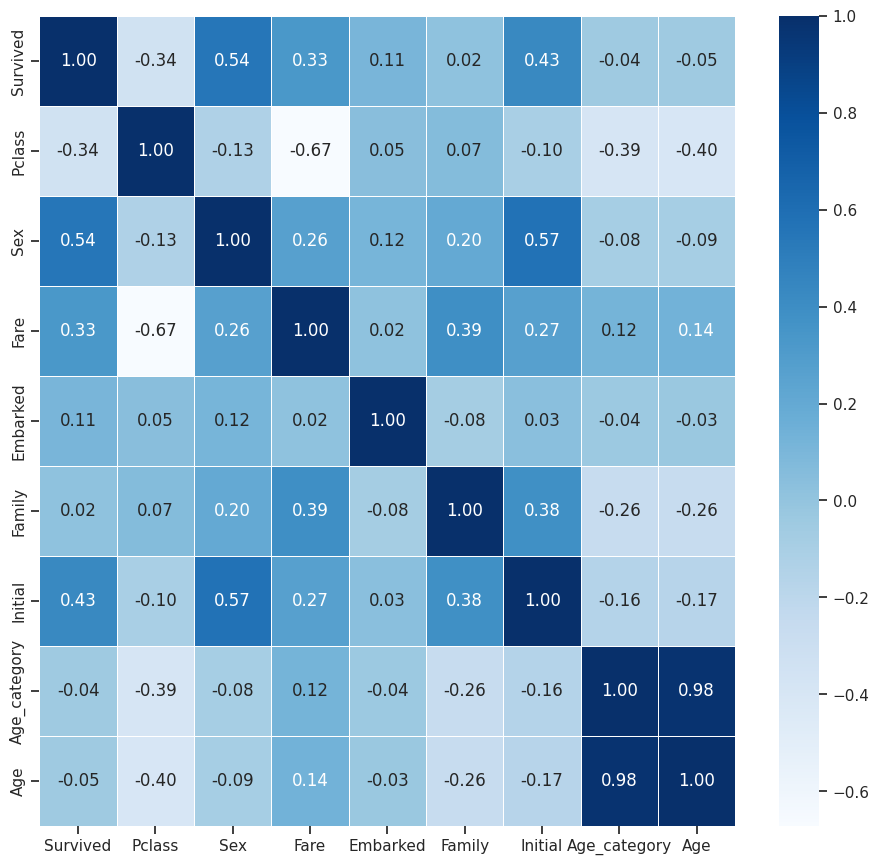

In [95]:
# 히트맵 컬럼 리스트 만들기
heatmap_col = ['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family','Initial', 'Age_category', 'Age']

# heatmap 만들기
plt.figure(figsize=(10,10))
sns.heatmap(ori_train[heatmap_col].corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

- Sex와 survived는 0.54정도의 상관관계
- Pclass와 survived는 -0.34정도의 상관관계
- fare과 Pclass는 -0.67정도 상관관계 (좋은 클래스일수록 요금이 높음)
- 따라서 fare과 survived도 0.33정도의 상관관계를 가진것으로 보인다.

=> **성별과 클래스는 어느정도 생존여부와 상관관계 있다**

## 8) 다중공선성

In [97]:
# 컬럼간의 다중공선성 분석

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = ori_train[['Pclass', 'Fare', 'Sex', 'SibSp', 'Parch','Initial']]  # 다중공선성을 파악할 컬럼 선택


# 상수항(Intercept) 추가
X = add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif)
#다중공선성은 띠지 않는 것으로 결과가 나왔습니다. (보통 5 이상을 유의하게 판단)

   Feature        VIF
0    const  67.043541
1   Pclass   2.367804
2     Fare   2.827034
3      Sex   1.537882
4    SibSp   1.497528
5    Parch   1.449892
6  Initial   1.683141


- 다중공선성을 띄지 않는 것으로 결과가 나왔습니다. (보통 5 이상을 유의하게 판단)

# 4. 필요없는 컬럼 드랍

In [99]:
ori_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)
ori_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [101]:
ori_train.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64
Embarked,int64
Family,int64
Age_category,int64
Initial,int64


In [102]:
ori_test.dtypes

,0
Pclass,int64
Sex,int64
Age,float64
Fare,float64
Embarked,int64
Family,int64
Age_category,int64
Initial,int64


# 5. 모델링

- 타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary) **binary classfication** 문제
- train 데이터셋의 survived를 제외한 input값을 최적화 -> 모델 최적화 -> 샘플(탑승객)의 생존유무 판단 모델 만들기
- 이후 ***test셋을 인풋으로 하여 test셋의 생존유무 예측***하기

## RandomForest

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델의 평가를 위해 사용
from sklearn.model_selection import train_test_split # training set 나누기

In [143]:
X_train = ori_train.drop('Survived', axis=1).values
target_label = ori_train['Survived'].values
X_test = ori_test.values

In [144]:
X_train.shape, X_test.shape

((891, 8), (418, 8))

- ori_train에서 training 세트와 valid 세트 분리 (train_test_split을 사용)

In [145]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target_label,
                                            test_size=0.2, random_state=42)

# train 사이즈 0.8, test 사이즈 0.2로

In [146]:
y_tr.shape, y_val.shape

((712,), (179,))

In [147]:
# 랜덤포레스트 모델 생성 및 학습

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_tr, y_tr)
prediction = random_forest.predict(X_val)

In [148]:
# 정확도

print("Accuracy: ", metrics.accuracy_score(y_val, prediction))

Accuracy:  0.8212290502793296


- 정확도: 82%정도

## feature importance

<Axes: ylabel='None'>

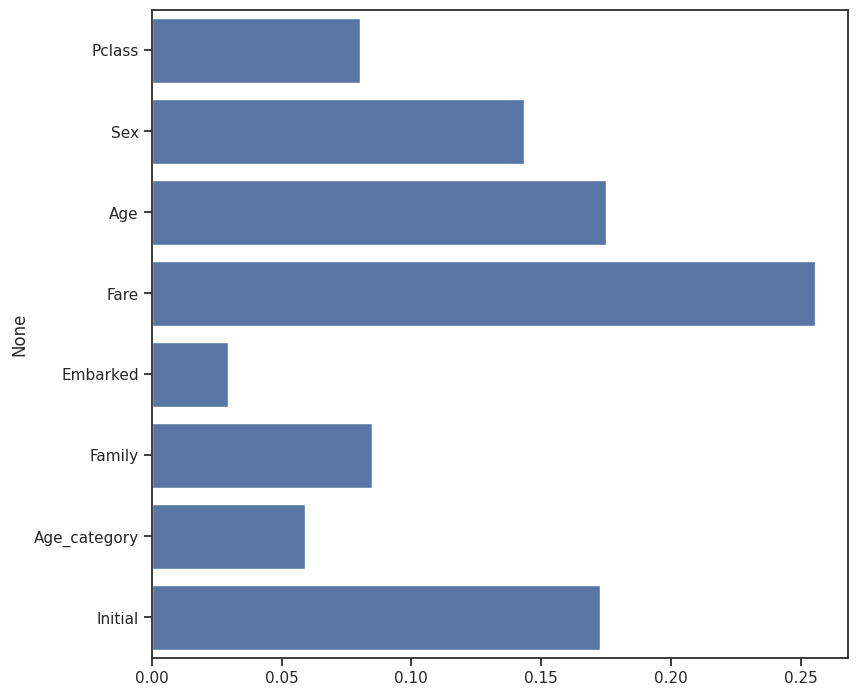

In [149]:
# feature importance

random_forest.feature_importances_

# 피쳐 중요도 시각화
plt.figure(figsize=(8,8))
sns.barplot(x=random_forest.feature_importances_, y=ori_train.drop('Survived', axis=1).columns)

## 모델 예측하기

In [150]:
X_test

array([[ 3. ,  0. , 34.5, ...,  0. ,  3. ,  0. ],
       [ 3. ,  1. , 47. , ...,  1. ,  4. ,  2. ],
       [ 2. ,  0. , 62. , ...,  0. ,  6. ,  0. ],
       ...,
       [ 3. ,  0. , 38.5, ...,  0. ,  3. ,  0. ],
       [ 3. ,  0. , 24. , ...,  0. ,  7. ,  0. ],
       [ 3. ,  0. , 24. , ...,  2. ,  7. ,  3. ]])

In [164]:
# ori_test의 survived 생존여부 예측하기

y_test = random_forest.predict(X_test)
y_test

# 예측 결과를 ori_test 데이터프레임에 추가
ori_test['Survived'] = y_test
ori_test

# 예측된 survived 값을 확인
print(ori_test['Survived'],
------------------------
ori_test['Survived'].value_counts())

0      0
1      0
2      0
3      1
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64 Survived
0    264
1    154
Name: count, dtype: int64


## 모델 성능 측정

In [169]:
# 모델의 성능 측정하기

from sklearn.model_selection import cross_val_score
score = cross_val_score(random_forest, X_test, y_test, cv=10)
print(score)


[0.97619048 0.97619048 0.95238095 0.83333333 0.97619048 0.9047619
 0.97619048 0.92857143 0.95121951 0.92682927]


In [176]:
# 검증 데이터로 성능 평가
from sklearn.metrics import roc_auc_score

# 실제 값과 예측 확률을 기반으로 ROC-AUC 계산
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]  # 생존 확률을 추출
roc_auc = roc_auc_score(ori_test['Survived'], y_pred_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 1.0


In [181]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [188]:
# 1. 기존 submission 파일에서 PassengerId를 가져옴

passenger_ids = submission['PassengerId']   # PassengerId만 추출

# 2. ori_test로 예측한 결과를 Survived로 사용
# y_test는 모델이 예측한 결과 (Survived 여부)
y_test = random_forest.predict(X_test)  # Survived 예측 결과 (이미 존재한다고 가정)

# 3. 새로운 submission 파일 생성: PassengerId + 예측된 Survived 결합
submission_new = pd.DataFrame({
    'PassengerId': passenger_ids,  # 기존 submission 파일에서 가져온 PassengerId
    'Survived': y_test  # 예측된 Survived 결과
})

# 4. 새로운 submission 파일을 CSV로 저장
submission_new.to_csv('submission_new.csv', index=False)

# 결과 출력 확인 (선택적)
print(submission_new.head(10))


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0
